<a href="https://colab.research.google.com/github/prachuryanath/TF-Learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb




In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-02 14:51:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  36.6MB/s    in 2.9s    

2021-05-02 14:51:18 (36.6 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (Become one with it)

In [2]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [3]:
!ls pizza_steak

test  train


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
    # Setup target directory (we'llview images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # Show the shape of the image

    return img

Image shape: (512, 512, 3)


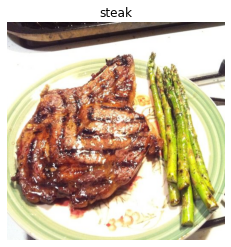

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [8]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 60,  45,  50],
        [ 55,  43,  47],
        [ 52,  39,  46],
        ...,
        [ 71,  67,  56],
        [ 74,  70,  59],
        [ 78,  74,  63]],

       [[ 62,  47,  52],
        [ 56,  43,  50],
        [ 52,  39,  46],
        ...,
        [ 78,  74,  63],
        [ 79,  75,  64],
        [ 81,  77,  66]],

       [[ 58,  43,  48],
        [ 55,  42,  49],
        [ 52,  39,  46],
        ...,
        [ 79,  75,  66],
        [ 80,  76,  67],
        [ 80,  76,  67]],

       ...,

       [[248, 252, 251],
        [247, 251, 250],
        [247, 251, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 252, 251],
        [247, 251, 250],
        [247, 251, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 252, 251],
        [247, 251, 250],
        [247, 251, 250],
        ...,
        [255, 255, 25

In [9]:
# View the image shape
img.shape       # return (width,height, color channels)

(512, 512, 3)

In [10]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.23529412, 0.17647059, 0.19607843],
        [0.21568627, 0.16862745, 0.18431373],
        [0.20392157, 0.15294118, 0.18039216],
        ...,
        [0.27843137, 0.2627451 , 0.21960784],
        [0.29019608, 0.2745098 , 0.23137255],
        [0.30588235, 0.29019608, 0.24705882]],

       [[0.24313725, 0.18431373, 0.20392157],
        [0.21960784, 0.16862745, 0.19607843],
        [0.20392157, 0.15294118, 0.18039216],
        ...,
        [0.30588235, 0.29019608, 0.24705882],
        [0.30980392, 0.29411765, 0.25098039],
        [0.31764706, 0.30196078, 0.25882353]],

       [[0.22745098, 0.16862745, 0.18823529],
        [0.21568627, 0.16470588, 0.19215686],
        [0.20392157, 0.15294118, 0.18039216],
        ...,
        [0.30980392, 0.29411765, 0.25882353],
        [0.31372549, 0.29803922, 0.2627451 ],
        [0.31372549, 0.29803922, 0.2627451 ]],

       ...,

       [[0.97254902, 0.98823529, 0.98431373],
        [0.96862745, 0.98431373, 0.98039216],
        [0.96862745, 0

## An end-to-end example
Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 267ms/step - loss: 0.6113 - accuracy: 0.6329 - val_loss: 0.4073 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4140 - accuracy: 0.8198 - val_loss: 0.3398 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3760 - accuracy: 0.8403 - val_loss: 0.4039 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3617 - accuracy: 0.8425 - val_loss: 0.3201 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3195 - accuracy: 0.8793 - val_loss: 0.2915 - val_accuracy: 0.8840


In [12]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0